**Rio de Janeiro, 15 de Maio de 2016**

Aluno: **Carlos Mattoso **_[ **1210553** ]_

Disciplina: **INF1608 - Análise Numérica**

# Lista 3

In [22]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as triangulation

%matplotlib inline

def f(x,y):
    return math.exp(-(x**2+y**2))*math.cos(x)
def g(x,y):
    return x*y

def reta(t,px,py,qx,qy):
    return px+t*(qx-px), py+t*(qy-py)

def bissecao(f,c,px,py,qx,qy,N):
    a = 0.0
    b = 1.0
    ax,ay = reta(a,px,py,qx,qy)
    bx,by = reta(b,px,py,qx,qy)
    m = (a+b)/2.0
    mx,my = reta(m,px,py,qx,qy)
    fa = f(ax,ay)-c
    fb = f(bx,by)-c
    fm = f(mx,my)-c
    for i in range(N):
        if (fa*fm < 0.0):
            b  = m
            fb = fm
        elif (fb*fm < 0.0):
            a  = m
            fa = fm
        else:
            break
        m  = (a+b)/2.0
        mx,my = reta(m,px,py,qx,qy)
        fm = f(mx,my)-c
    return mx,my

def triangleintersect(f,c,ax,ay,bx,by,cx,cy,N):
    fa = f(ax,ay)-c
    fb = f(bx,by)-c
    fc = f(cx,cy)-c
    p  = []
    if (fa*fb <= 0.0):
        p.append(bissecao(f,c,ax,ay,bx,by,N))
    if (fb*fc <= 0.0):
        p.append(bissecao(f,c,bx,by,cx,cy,N))
    if (fc*fa <= 0.0):
        p.append(bissecao(f,c,cx,cy,ax,ay,N))
    return p

def twocurves(f,g,c,xmin,xmax,ymin,ymax,m,n,NB):
    deltax = (xmax - xmin)/m
    deltay = (ymax - ymin)/n
    l = []
    k = []
    tri_centers = []
    xpt = []
    ypt = []
    for i in range(n):
        x0 = xmin + i*deltax
        x1 = x0 + deltax

        for j in range(m): 
            y0 = ymin + j*deltay
            y1 = y0 + deltay
            
            # right triangle
            aresta_f = triangleintersect(f,c,x0,y0,x1,y0,x1,y1,NB)
            if (aresta_f):
                l.append(aresta_f)
            aresta_g = triangleintersect(g,c,x0,y0,x1,y0,x1,y1,NB)
            if (aresta_g):
                k.append(aresta_g)   
            # checa se zeros foram achados para ambas; se sim,
            # então há chance das funções se cortarem neste nível
            if (aresta_f and aresta_g):
                tri_centers.append(((x0 + 2.0*x1)/3.0, (2.0*y0 + y1)/3.0)) # centroid   
            
            # left triangle
            aresta_f = triangleintersect(f,c,x0,y0,x1,y1,x0,y1,NB)
            if (aresta_f):
                l.append(aresta_f)
            aresta_g = triangleintersect(g,c,x0,y0,x1,y1,x0,y1,NB)
            if (aresta_g):
                k.append(aresta_g)
            # checa se zeros foram achados para ambas; se sim,
            # então há chance das funções se cortarem neste nível
            if (aresta_f and aresta_g):
                tri_centers.append(((2.0*x0 + x1)/3.0, (y0 + 2.0*y1)/3.0)) # centroid
    
    return l, k, tri_centers

# Exibe as curvas de nível e os centros de triângulos encontrados
def plot_curves(l, k, tri_centers, xmin, xmax, ymin, ymax, m, n):
    fig = plt.gcf()
    fig.set_size_inches(16.5, 8.5)
    
    deltax = (xmax - xmin)/m
    deltay = (ymax - ymin)/n
    
    # Exibe curva de nível da f(x,y)
    for i in range(len(l)):
        px = []
        py = [] 
        for j in range(len(l[i])):
            px.append(l[i][j][0])
            py.append(l[i][j][1])
        plt.plot(px,py,color='blue')
        
    # Exibe curva de nível da g(x,y)
    for i in range(len(k)):
        px = []
        py = [] 
        for j in range(len(k[i])):
            px.append(k[i][j][0])
            py.append(k[i][j][1])
        plt.plot(px,py,color='red')
        
    # Exibe os centros de triângulo que tem chance de haver o
    # cruzamento das curvas de nível das funções f e g. Adiciona
    # um pouco de jitter para caso haja mais de um perto do outro possa-se ver.
    px = []
    py = []
    random.seed()
    for i in range(len(tri_centers)):
        px.append(tri_centers[i][0] + random.uniform(-deltax/100.0, deltax/100.0))
        py.append(tri_centers[i][1] + random.uniform(-deltay/100.0, deltay/100.0))
    plt.plot(px,py,"gx", markersize=12, fillstyle="none", markeredgewidth=1.5)
    
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.show()

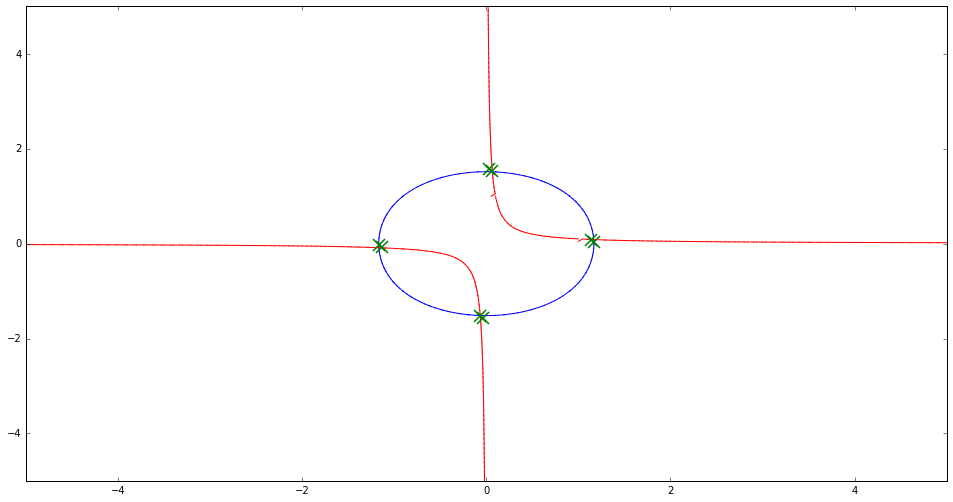

In [23]:
l, k, tri_centers = twocurves(f,g,0.1,-5.0,5.0,-5.0,5.0,100,100,20)
plot_curves(l, k, tri_centers, -5.0, 5.0, -5.0, 5.0, 100, 100)

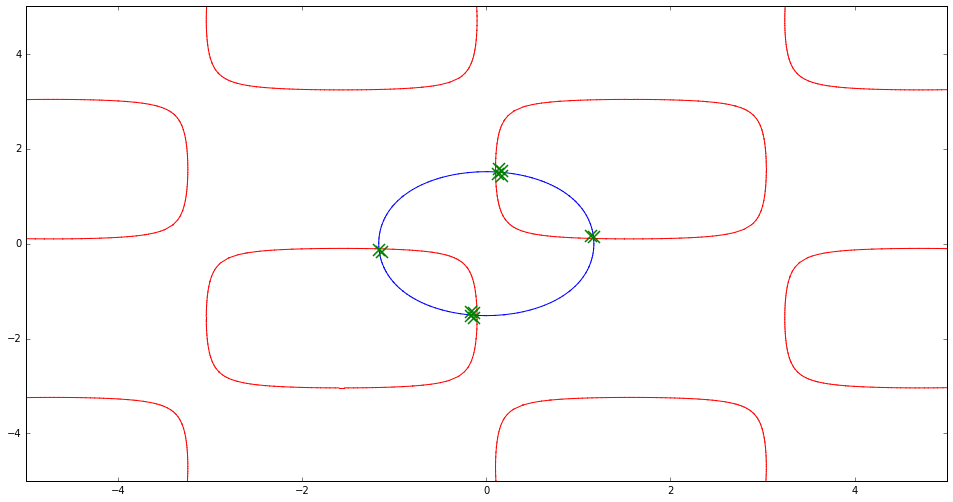

In [24]:
def f1(x,y):
    return math.exp(-(x**2+y**2))*math.cos(x)
def f2(x,y):
    return math.sin(x) * math.sin(y)

l,k,tri_centers = twocurves(f1,f2,0.1,-5.0,5.0,-5.0,5.0,100,100,20)
plot_curves(l, k, tri_centers, -5.0, 5.0, -5.0, 5.0, 100, 100)

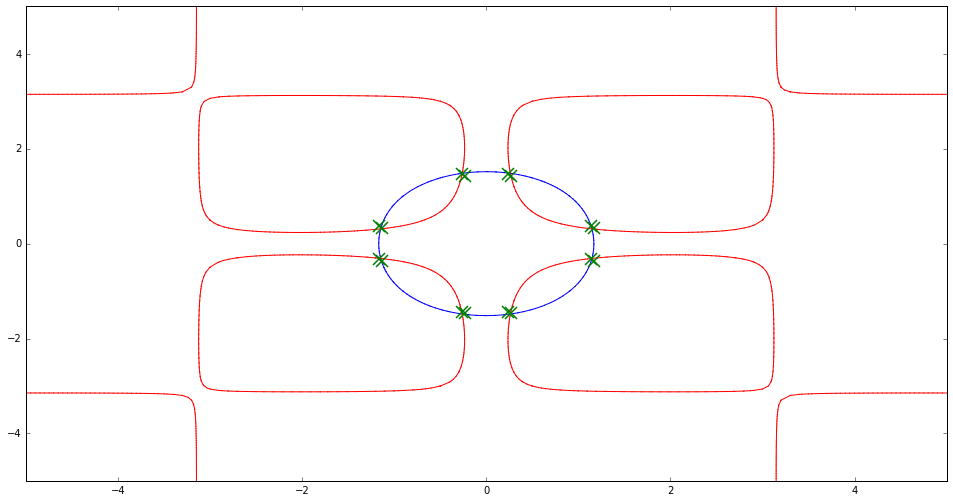

In [25]:
def f1(x,y):
    return math.exp(-(x**2+y**2))*math.cos(x)
def f2(x,y):
    return math.sin(x) * math.sin(y) * x*y

l,k,tri_centers = twocurves(f1,f2,0.1,-5.0,5.0,-5.0,5.0,100,100,20)
plot_curves(l, k, tri_centers, -5.0, 5.0, -5.0, 5.0, 100, 100)

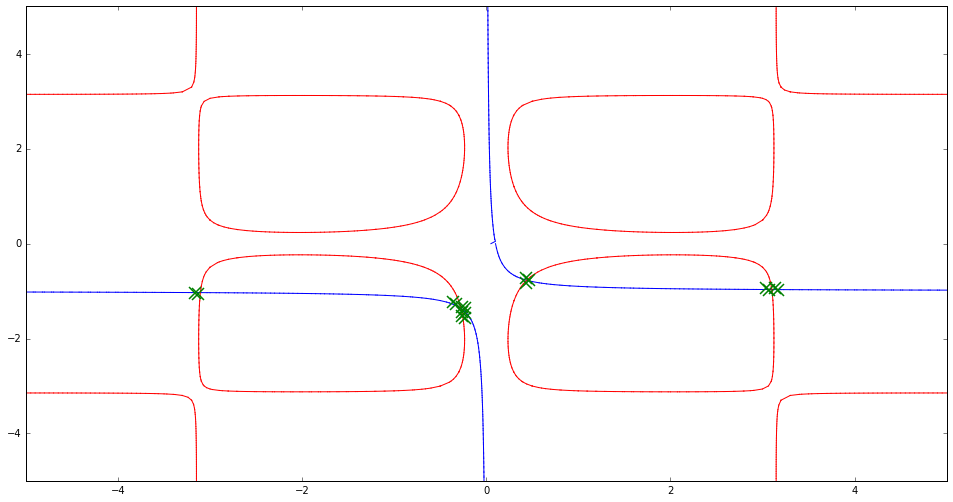

In [26]:
def f1(x,y):
    return x*y + x
def f2(x,y):
    return math.sin(x) * math.sin(y) * x*y

l,k,tri_centers = twocurves(f1,f2,0.1,-5.0,5.0,-5.0,5.0,100,100,20)
plot_curves(l, k, tri_centers, -5.0, 5.0, -5.0, 5.0, 100, 100)